In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Configuración inicial
pio.renderers.default = 'colab'
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8')
font = {'fontsize': 16, 'fontstyle': 'italic', 'backgroundcolor': 'black', 'color': 'orange'}

# Cargar los datos de películas (directamente desde Colab)
data = pd.read_csv('/content/movie_success_rate.csv')
df = pd.DataFrame(data)

# Preprocesamiento de datos
df = df[['Votes', 'Revenue (Millions)', 'Runtime (Minutes)', 'Rating', 'Metascore', 'Success']]

# Manejar valores faltantes
df.dropna(inplace=True)

# Codificar variable objetivo (Success)
le = LabelEncoder()
df['Success'] = le.fit_transform(df['Success'])

# Dividir datos en conjuntos de entrenamiento y prueba
X = df.drop('Success', axis=1)
y = df['Success']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementar modelo Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# Evaluar modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Precisión del modelo: {accuracy}")
print(f"Matriz de confusión:\n{conf_matrix}")
print(f"Reporte de clasificación:\n{class_report}")


Precisión del modelo: 0.8690476190476191
Matriz de confusión:
[[120  13]
 [  9  26]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       133
           1       0.67      0.74      0.70        35

    accuracy                           0.87       168
   macro avg       0.80      0.82      0.81       168
weighted avg       0.88      0.87      0.87       168



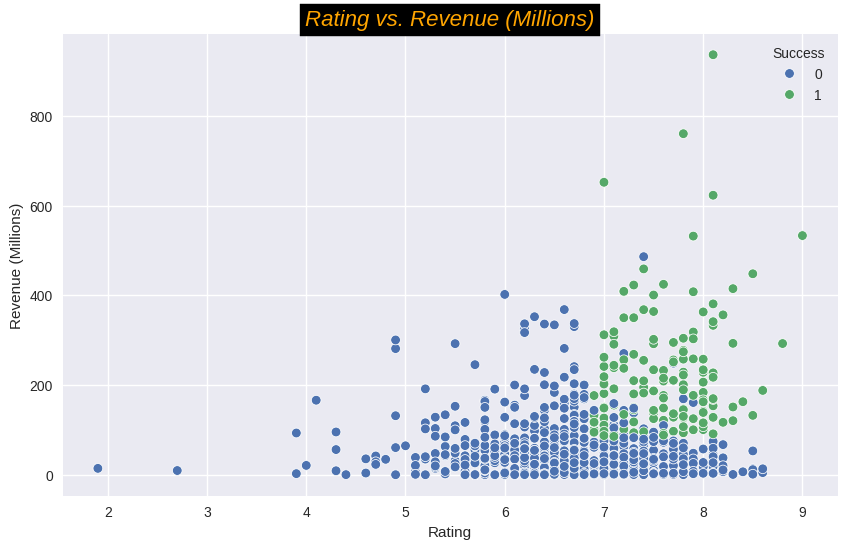

In [16]:
# Gráfico de dispersión de Rating vs. Revenue (Millions), coloreado por 'Success'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Rating', y='Revenue (Millions)', hue='Success')
plt.title('Rating vs. Revenue (Millions)', fontdict=font)
plt.show()

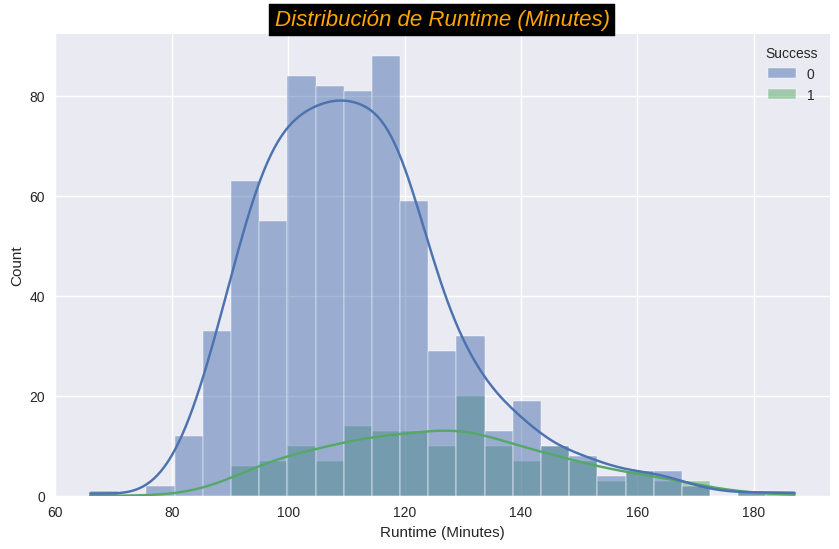

In [17]:
# Histograma de Runtime (Minutes), coloreado por 'Success'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Runtime (Minutes)', hue='Success', kde=True)
plt.title('Distribución de Runtime (Minutes)', fontdict=font)
plt.show()

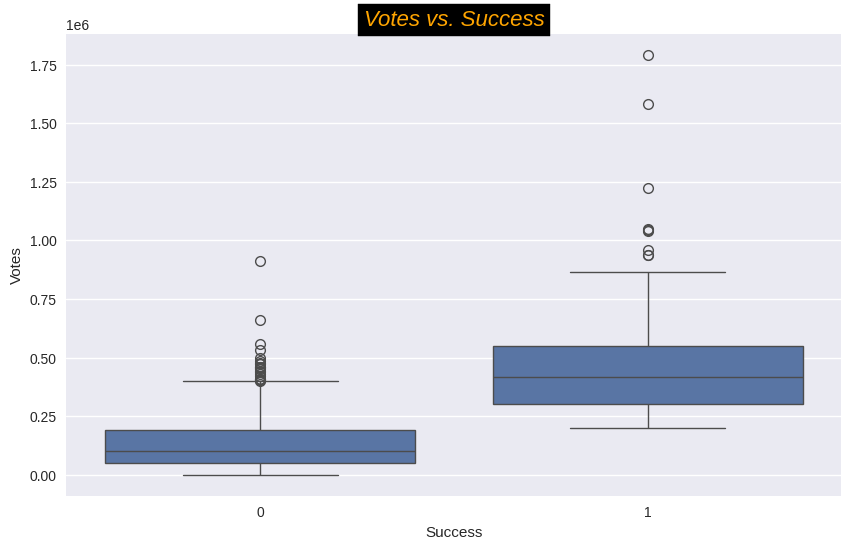

In [18]:
# Boxplot de Votes para cada valor de 'Success'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Success', y='Votes')
plt.title('Votes vs. Success', fontdict=font)
plt.show()

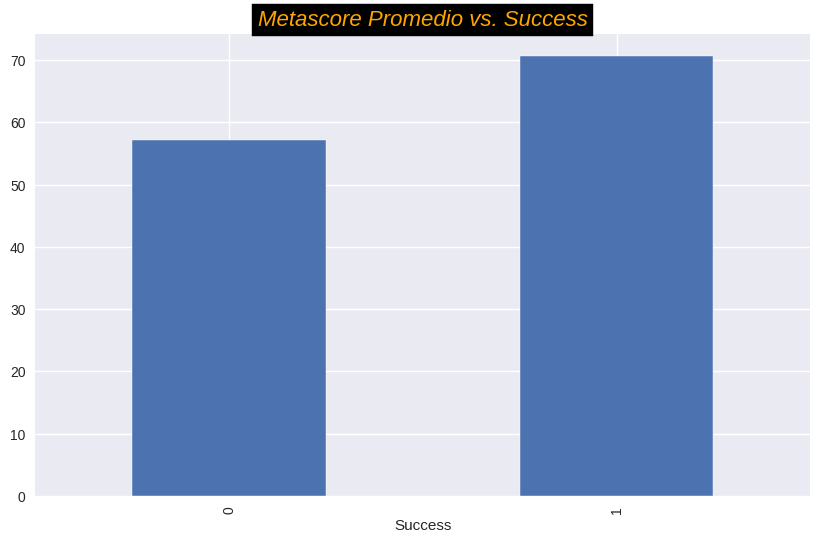

In [19]:
# Gráfico de barras de la media de Metascore para cada valor de 'Success'
plt.figure(figsize=(10, 6))
df.groupby('Success')['Metascore'].mean().plot(kind='bar')
plt.title('Metascore Promedio vs. Success', fontdict=font)
plt.show()

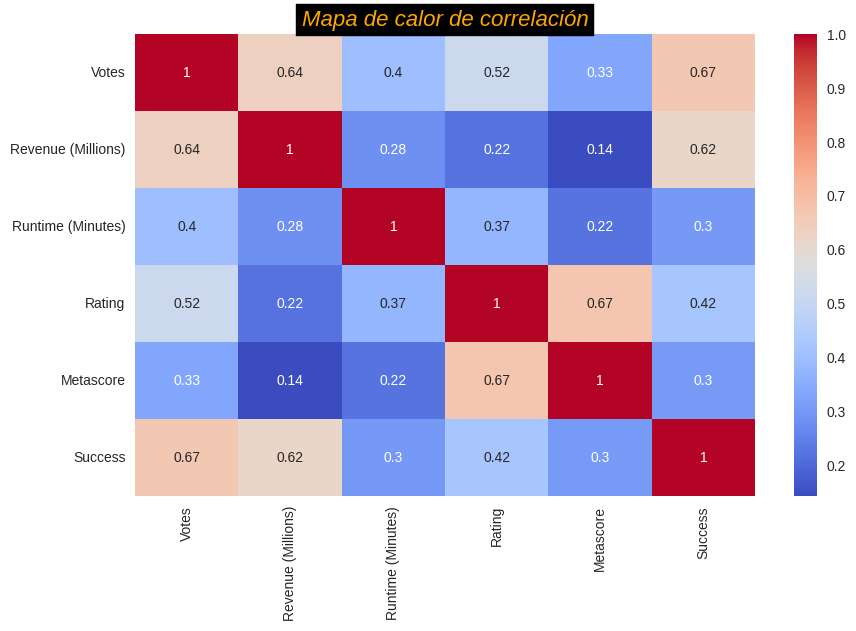

In [20]:
# Mapa de calor de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Votes', 'Revenue (Millions)', 'Runtime (Minutes)', 'Rating', 'Metascore', 'Success']].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación', fontdict=font)
plt.show()

In [21]:
# Gráfico 3D interactivo con Plotly
fig = px.scatter_3d(
    data_frame=df,
    x='Rating',
    y='Revenue (Millions)',
    z='Votes',
    color='Success',
    template='plotly_dark',
    opacity=0.7,
    height=700,
    title='Relación 3D: Rating, Revenue y Votes por Success'
)
fig.show()